<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
house_csv = "data/Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

# Print Head
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [5]:
house.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [6]:
# Some 0 values for sq_ft, which should be impossible for a property
# Change 0 values to NaN
house.sq__ft.replace(0, np.nan, inplace=True)

# Replace NaN with new mean (mean has been altered by removal of 0 values)
house.sq__ft.fillna(house.sq__ft.mean(), inplace=True)


In [7]:
# No null values. Convert sale_date to datetime
# import datetime
import datetime

# Convert
house.sale_date = pd.to_datetime(house.sale_date)
# Verify
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   street     985 non-null    object        
 1   city       985 non-null    object        
 2   zip        985 non-null    int64         
 3   state      985 non-null    object        
 4   beds       985 non-null    int64         
 5   baths      985 non-null    int64         
 6   sq__ft     985 non-null    float64       
 7   type       985 non-null    object        
 8   sale_date  985 non-null    datetime64[ns]
 9   price      985 non-null    int64         
 10  latitude   985 non-null    float64       
 11  longitude  985 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 92.5+ KB


C:\Users\jacks\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


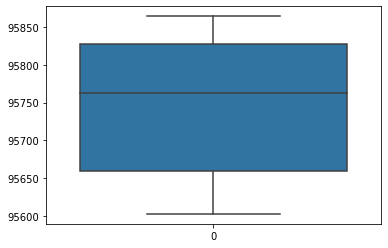

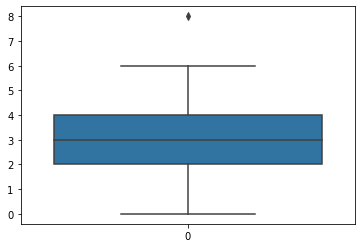

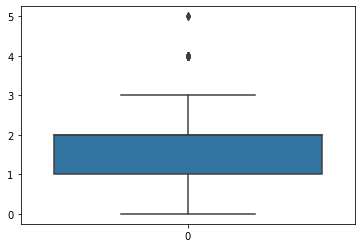

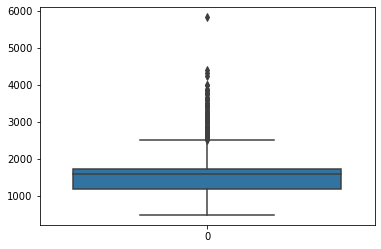

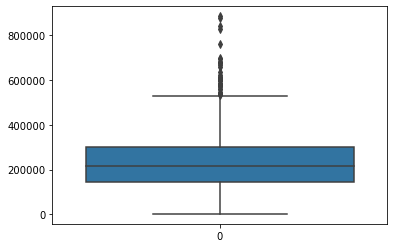

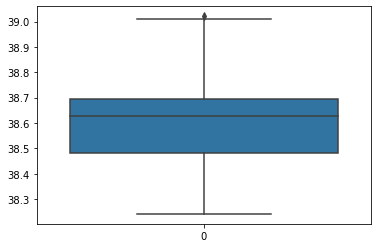

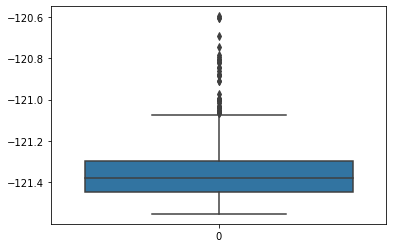

In [8]:
# Check outliers
for x in (house.select_dtypes(include=['int64', 'float64']).columns):
    sns.boxplot(data=house[x])
    plt.show()

In [9]:
# Plenty of statistical outliers as shown above - 
# Remove from beds and baths, keep others as they may be valuable

# Create function to drop using standard deviation and the mean:
def outlierdrop(df,colname):
    # Assign upper and lower limits
    upper_limit= df[colname].mean () + 3 *df[colname].std ()
    lower_limit = df[colname].mean () - 3 *df[colname].std ()
    new_df = df[(df[colname] < upper_limit) &
    (df[colname] > lower_limit)]
    return new_df

# Apply function to required columns
house = outlierdrop(house, 'beds')
house = outlierdrop(house, 'baths')


<AxesSubplot:>

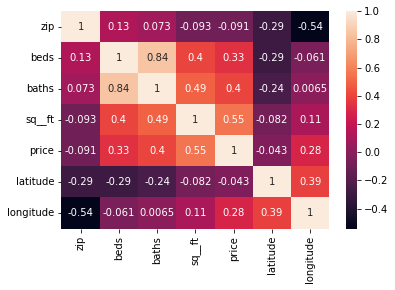

In [10]:
# Generate correlation heatmap
sns.heatmap(house.corr(), annot=True)

Longitude/latitude/zip all correlated, this is to be expected.
<br><br>
Price has no significantly largest correlative, but is correlated slightly with baths, sq_ft, beds, and longitude; in that order.
<br><br>
Beds, baths, and sq_ft are all intercorrelated between 0.67 - 0.84, reducing usefulness of using all of them for multivariate regression.

In [11]:
# Produce locational heat map using lat/long and price
# Begin by importing folium
import folium

In [12]:
# Create Base map
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=8):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [13]:
base_map = generateBaseMap(default_location=[house.latitude.iloc[1], house.longitude.iloc[1]], default_zoom_start=10)
display(base_map)

In [14]:
# Use branca ColorMap method - import
from folium import plugins
import branca
from branca import colormap

In [15]:
# Create datasets. Should be a list of latitudes, longitudes, and the weighting given
lat = list(house.latitude)
lon = list(house.longitude)
price = list(house.price)

# Define minimum and maximum values for the colormap
vmin = min(price)
vmax = max(price)

# Create Colormap
colourmap = colormap.LinearColormap(colors=['lightblue','red'], vmin=vmin, vmax=vmax)

# Add list items to map using folium Circle method
# Colouring according to colormap
for loc, p in zip(zip(lat, lon), price):
    folium.Circle(
        location=loc,
        radius=100,
        fill=True,
        color=colourmap(p),
        fill_opacity=0.5
    ).add_to(base_map)

base_map.add_child(colourmap)

display(base_map)

From the map, there are some clear areas with very high value properties around the outskirts of the city - presumably large land holdings.

There appears to be a middle band of properties around the city centre with lower values - property values in the city start somewhat higher, then depress in the middle ring, then raise again in the outer ring.

Proximity to major highways also seems to affect prices slightly, but hard to determine.

In [16]:
# Testing - find distance from city centre (taken as capitol museum)
# correlatie with price
city_centre = (38.5763, -121.493251)

# Create distance dataseries
# Both latitudinal and longitudinal distance required
latdist = house.latitude - city_centre[0]
londist = house.longitude - city_centre[1]

# Combine
totaldist = np.sqrt(latdist**2 + londist**2)

# Add to dataframe as a column
house['dist_from_city'] = totaldist

house.head()



,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist_from_city
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Residential,2008-05-21,59222,38.631913,-121.434879,0.080623
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Residential,2008-05-21,68212,38.478902,-121.431028,0.115577
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Residential,2008-05-21,68880,38.618305,-121.443839,0.064853
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Residential,2008-05-21,69307,38.616835,-121.439146,0.067605
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Residential,2008-05-21,81900,38.519470,-121.435768,0.080833


In [17]:
# Find correlation

house.price.corr(house.dist_from_city)

0.24845613389793927

Correlation value is worse than simply using longitude (at 0.28)

C:\Users\jacks\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='type', ylabel='price'>

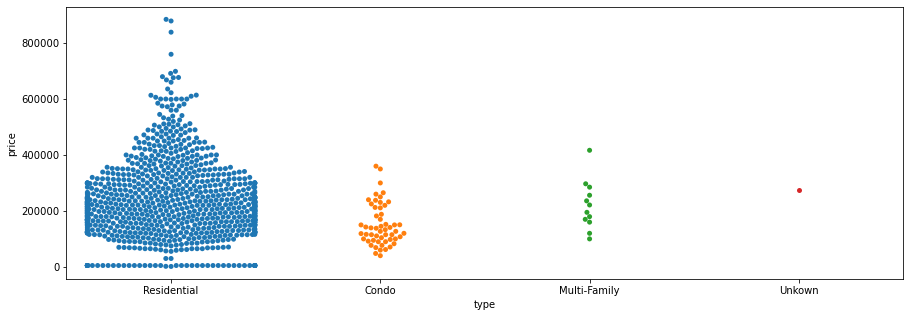

In [18]:
# Produce swarmplot of price vs type
plt.figure(figsize=(15,5))
sns.swarmplot(x='type', y='price', data=house)

An observation from this is that there is a lot less data for data other than residential, and condo properties' price distribution is clustered lower when compared with residential/Multi-family (could potentially be due to lack of outliers)

In [19]:
# Verify the above with raw data
house.groupby('type').price.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Condo,54.0,150082.185185,74431.071849,40000.0,98500.0,130000.0,205208.0,360000.0
Multi-Family,12.0,219712.583333,86968.385481,100000.0,167475.0,208125.0,263290.5,416767.0
Residential,915.0,238058.700546,138395.106449,1551.0,150000.0,217500.0,305000.0,884790.0
Unkown,1.0,275000.000000,NaN,275000.0,275000.0,275000.0,275000.0,275000.0


In [20]:
# find whether multi-family and residentioal are distinct by determining null hypothesis
# import t-test function
from scipy.stats import ttest_ind

# Define populations
a = house.loc[house.type == 'Residential'].price
b = house.loc[house.type == 'Multi-Family'].price

t, p = ttest_ind(a, b)
print('\t t-test is', t, '\n\t p value is', p)

	 t-test is 0.45788133468244735 
	 p value is 0.6471452341887389


In [21]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

print_sig(p, 0.05)

We fail to reject our null hypothesis.


So multi-family houses and residential houses are statistically indistinguishable. As far as type is concerned, the only thing that matters is Condo or not Condo.

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [22]:
# ANSWER
# Target variable is price. Target variable is the variable requiring prediction

#### 2.2 List all possible variables which might be Predictor variable.

In [23]:
# ANSWER
# Baths - highest correlation with price
# Beds - second highest correlation with price
# Sq_ft is to be used - third highest correlation
# Longitude - fourth highest correlation
# Property type - distinct difference between condos and other properties

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [24]:
# ANSWER
# See correlation matrix above
# Best predictor is sq_ft as it has the highest correlation with house data out of the continuous variables, 
# and high intercorrelation with two other variables.

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [36]:
# ANSWER
# Simplest way to predict price is through a mean value
mean_price = house.price.mean()
print(mean_price)

233034.31771894093


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [38]:
# ANSWER
# Calculate residuals
mean_residuals = abs(house.price - mean_price)

# Print mean absolute error
mean_absolute_error = mean_residuals.sum()/len(mean_residuals)
print(mean_absolute_error)

102478.72460708227


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [27]:
# ANSWER
X = house.sq__ft.values
y = house.price.values


##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [28]:
# ANSWER
# Import regression model
from sklearn.linear_model import LinearRegression

# Fit model to data
# initialise values
beta_1_numer = 0
beta_1_denom = 0

# Create for loops for numer and denom
for i,j in zip(X,y):
    num = (i - np.mean(X))*(j - np.mean(y))
    beta_1_numer += num

for i in X:
    num2 = (i - np.mean(X))**2
    beta_1_denom += num2

beta_1 = beta_1_numer/beta_1_denom

beta_1



125.35621488321244

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [29]:
# ANSWER
beta_0 = np.mean(y) - beta_1 * np.mean(X)

beta_0

33992.41094468467

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [30]:
# ANSWER
y_predict = beta_0 + (beta_1 * X)

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [31]:
# ANSWER
residual = y - y_predict

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [32]:
# ANSWER
def r_square(y, ypred):
    SStot = np.sum(((y-np.mean(y))**2))
    SSres = np.sum(((y-ypred)**2))

    R_2 = 1 - SSres/SStot
    return R_2

r_square(y, y_predict)
    

0.3030920716283143

##### 2.7.F [BONUS] Draw Plot of Predicted Line

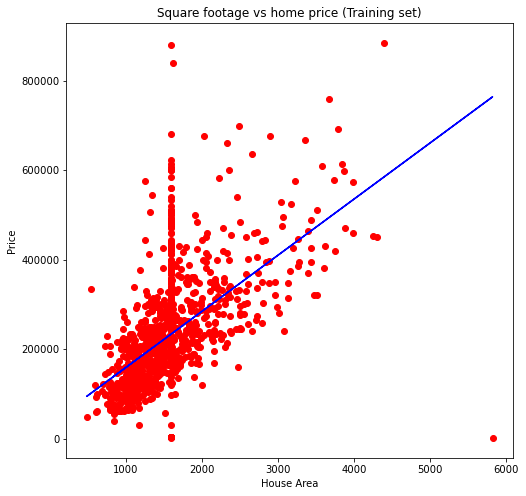

In [33]:
# ANSWER
# Visualising the results

plt.figure(figsize=(8, 8))

# Real data
plt.scatter(X, y, color = 'red')
# Prediction
plt.plot(X, y_predict, color = 'blue')
plt.title('Square footage vs home price (Training set)')
plt.xlabel('House Area')
plt.ylabel('Price')
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

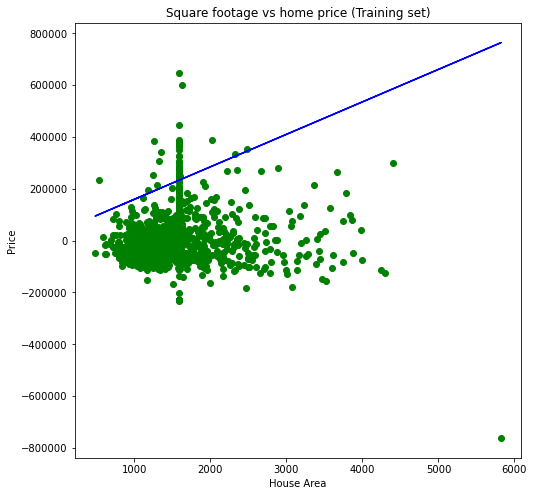

In [34]:
# ANSWER
# Visualising the results

plt.figure(figsize=(8, 8))

# Residual data
plt.scatter(X, residual, color = 'green')
# Prediction
plt.plot(X, y_predict, color = 'blue')
plt.title('Square footage vs home price (Training set)')
plt.xlabel('House Area')
plt.ylabel('Price')
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [35]:
# ANSWER
# Use beta_1 and beta_0 to predict
sq_ft = 1204
pred_price = 1204 * beta_1 + beta_0

print(pred_price)

184921.29366407247




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



